# Modeling - KNN
(Using the top 10 features)

### Importing the libraries and Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import _pickle as pickle

In [2]:
with open("top10_df.pkl", "rb") as fp:
    df = pickle.load(fp)

## Preparing the Data

### Scaling the Data

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_df = df.drop(["Decision"], 1)

scaled_df = pd.DataFrame(scaler.fit_transform(features_df), 
                               index=features_df.index, 
                               columns=features_df.columns)

df = scaled_df.join(df.Decision)

### Train, test, split the DF

In [4]:
X = df.drop(["Decision"], 1)
y = df.Decision

# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Functions

In [5]:
def plot_confusion_matrix(y_true, y_pred, labels=["Sell", "Buy", "Hold"], 
                          normalize=False, title=None, cmap=plt.cm.cividis):

    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='ACTUAL',
           xlabel='PREDICTED')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="crimson" if cm[i, j] > thresh else "crimson",
                    size=26)
    ax.grid(False)
    fig.tight_layout()
    return ax

In [6]:
def mod_results(clf, X_train, X_test, y_train, y_test):
    """
    Displays the results of a fitted model with a Confusion Matrix
    """
    # Getting predictions for the training set
    train_preds = clf.predict(X_train)

    # Getting predictions for the testing set
    test_preds = clf.predict(X_test)

    # Scores for both predictions
    train_score = accuracy_score(y_train, train_preds)
    test_score = accuracy_score(y_test, test_preds)

    # Printing Results
    print(f"Training Accuracy: {train_score} \t\t Testing Accuracy: {test_score}")
    
    # Displaying Confusion Matrix
    plot_confusion_matrix(y_test, test_preds, title="Confusion Matrix")
    np.set_printoptions(precision=1)
    
    # Plot non-normalized confusion matrix
    plt.show()

## KNN Modeling

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Instatiating the model classifier
k_clf = KNeighborsClassifier(n_neighbors=200)

# Fitting to the Data
k_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=200, p=2,
           weights='uniform')

K Nearest Neighbors
Training Accuracy: 0.4422616673314719 		 Testing Accuracy: 0.43374214777146275


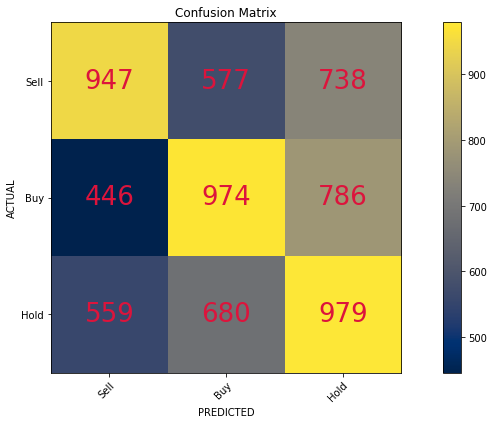

In [8]:
# Printing Results
print("K Nearest Neighbors")

# Modeling and Confusion Matrix
mod_results(k_clf, X_train, X_test, y_train, y_test)

## KNN - Results
with the scaled top 10 features

In [9]:
# K Nearest Neighbors
# Training Accuracy: 0.4422616673314719 		 Testing Accuracy: 0.43374214777146275

### RandomizedSearchCV - KNN

In [10]:
from sklearn.model_selection import RandomizedSearchCV

In [11]:
params = {"n_neighbors": [100, 200, 500],
          "weights": ['uniform', 'distance'],
          "p": [1,2]}

In [15]:
ran_search = RandomizedSearchCV(k_clf, params, n_iter=2, verbose=5)

%timeit ran_search.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] weights=distance, p=1, n_neighbors=200 ..........................
[CV]  weights=distance, p=1, n_neighbors=200, score=0.41280287167215074, total=   1.8s
[CV] weights=distance, p=1, n_neighbors=200 ..........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s remaining:    0.0s


[CV]  weights=distance, p=1, n_neighbors=200, score=0.4273747195213164, total=   2.5s
[CV] weights=distance, p=1, n_neighbors=200 ..........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.4s remaining:    0.0s


[CV]  weights=distance, p=1, n_neighbors=200, score=0.4350037397157816, total=   2.5s
[CV] weights=distance, p=1, n_neighbors=100 ..........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.7s remaining:    0.0s


[CV]  weights=distance, p=1, n_neighbors=100, score=0.41803769069697877, total=   1.6s
[CV] weights=distance, p=1, n_neighbors=100 ..........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   24.8s remaining:    0.0s


[CV]  weights=distance, p=1, n_neighbors=100, score=0.42303664921465967, total=   1.9s
[CV] weights=distance, p=1, n_neighbors=100 ..........................
[CV]  weights=distance, p=1, n_neighbors=100, score=0.4243829468960359, total=   2.0s
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] weights=uniform, p=1, n_neighbors=500 ...........................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   36.5s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  weights=uniform, p=1, n_neighbors=500, score=0.4255160035895902, total=   3.0s
[CV] weights=uniform, p=1, n_neighbors=500 ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.4s remaining:    0.0s


[CV]  weights=uniform, p=1, n_neighbors=500, score=0.42677636499626026, total=   3.2s
[CV] weights=uniform, p=1, n_neighbors=500 ...........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.9s remaining:    0.0s


[CV]  weights=uniform, p=1, n_neighbors=500, score=0.4356020942408377, total=   3.0s
[CV] weights=uniform, p=2, n_neighbors=200 ...........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   27.1s remaining:    0.0s


[CV]  weights=uniform, p=2, n_neighbors=200, score=0.41699072689201316, total=   1.4s
[CV] weights=uniform, p=2, n_neighbors=200 ...........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   31.2s remaining:    0.0s


[CV]  weights=uniform, p=2, n_neighbors=200, score=0.4305160807778609, total=   2.2s
[CV] weights=uniform, p=2, n_neighbors=200 ...........................
[CV]  weights=uniform, p=2, n_neighbors=200, score=0.4329094988780853, total=   1.9s
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] weights=uniform, p=1, n_neighbors=500 ...........................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   43.1s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  weights=uniform, p=1, n_neighbors=500, score=0.4255160035895902, total=   2.7s
[CV] weights=uniform, p=1, n_neighbors=500 ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.9s remaining:    0.0s


[CV]  weights=uniform, p=1, n_neighbors=500, score=0.42677636499626026, total=   3.2s
[CV] weights=uniform, p=1, n_neighbors=500 ...........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.4s remaining:    0.0s


[CV]  weights=uniform, p=1, n_neighbors=500, score=0.4356020942408377, total=   3.2s
[CV] weights=distance, p=1, n_neighbors=100 ..........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   26.7s remaining:    0.0s


[CV]  weights=distance, p=1, n_neighbors=100, score=0.41803769069697877, total=   1.3s
[CV] weights=distance, p=1, n_neighbors=100 ..........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   30.6s remaining:    0.0s


[CV]  weights=distance, p=1, n_neighbors=100, score=0.42303664921465967, total=   1.9s
[CV] weights=distance, p=1, n_neighbors=100 ..........................
[CV]  weights=distance, p=1, n_neighbors=100, score=0.4243829468960359, total=   1.8s
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] weights=uniform, p=2, n_neighbors=500 ...........................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   41.7s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  weights=uniform, p=2, n_neighbors=500, score=0.42087944959617113, total=   2.2s
[CV] weights=uniform, p=2, n_neighbors=500 ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.5s remaining:    0.0s


[CV]  weights=uniform, p=2, n_neighbors=500, score=0.42408376963350786, total=   3.1s
[CV] weights=uniform, p=2, n_neighbors=500 ...........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   16.8s remaining:    0.0s


[CV]  weights=uniform, p=2, n_neighbors=500, score=0.43470456245325356, total=   3.0s
[CV] weights=distance, p=2, n_neighbors=500 ..........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   25.0s remaining:    0.0s


[CV]  weights=distance, p=2, n_neighbors=500, score=0.42132814836972776, total=   2.2s
[CV] weights=distance, p=2, n_neighbors=500 ..........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   31.6s remaining:    0.0s


[CV]  weights=distance, p=2, n_neighbors=500, score=0.42797307404637247, total=   2.9s
[CV] weights=distance, p=2, n_neighbors=500 ..........................
[CV]  weights=distance, p=2, n_neighbors=500, score=0.43664921465968587, total=   2.7s
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] weights=distance, p=1, n_neighbors=500 ..........................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   48.4s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  weights=distance, p=1, n_neighbors=500, score=0.42536643733173796, total=   2.7s
[CV] weights=distance, p=1, n_neighbors=500 ..........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.7s remaining:    0.0s


[CV]  weights=distance, p=1, n_neighbors=500, score=0.4275243081525804, total=   3.8s
[CV] weights=distance, p=1, n_neighbors=500 ..........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   20.4s remaining:    0.0s


[CV]  weights=distance, p=1, n_neighbors=500, score=0.4362004487658938, total=   3.3s
[CV] weights=uniform, p=1, n_neighbors=500 ...........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   30.2s remaining:    0.0s


[CV]  weights=uniform, p=1, n_neighbors=500, score=0.4255160035895902, total=   3.0s
[CV] weights=uniform, p=1, n_neighbors=500 ...........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   39.0s remaining:    0.0s


[CV]  weights=uniform, p=1, n_neighbors=500, score=0.42677636499626026, total=   3.2s
[CV] weights=uniform, p=1, n_neighbors=500 ...........................
[CV]  weights=uniform, p=1, n_neighbors=500, score=0.4356020942408377, total=   3.7s
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] weights=uniform, p=1, n_neighbors=100 ...........................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.0min finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  weights=uniform, p=1, n_neighbors=100, score=0.4171402931498654, total=   1.6s
[CV] weights=uniform, p=1, n_neighbors=100 ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s


[CV]  weights=uniform, p=1, n_neighbors=100, score=0.4231862378459237, total=   2.4s
[CV] weights=uniform, p=1, n_neighbors=100 ...........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.7s remaining:    0.0s


[CV]  weights=uniform, p=1, n_neighbors=100, score=0.424981301421092, total=   2.2s
[CV] weights=distance, p=2, n_neighbors=200 ..........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   19.0s remaining:    0.0s


[CV]  weights=distance, p=2, n_neighbors=200, score=0.4156446305713431, total=   1.5s
[CV] weights=distance, p=2, n_neighbors=200 ..........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   23.4s remaining:    0.0s


[CV]  weights=distance, p=2, n_neighbors=200, score=0.43171278982797306, total=   2.2s
[CV] weights=distance, p=2, n_neighbors=200 ..........................
[CV]  weights=distance, p=2, n_neighbors=200, score=0.42976813762154076, total=   2.0s
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] weights=distance, p=1, n_neighbors=500 ..........................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   36.3s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  weights=distance, p=1, n_neighbors=500, score=0.42536643733173796, total=   3.1s
[CV] weights=distance, p=1, n_neighbors=500 ..........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.1s remaining:    0.0s


[CV]  weights=distance, p=1, n_neighbors=500, score=0.4275243081525804, total=   6.0s
[CV] weights=distance, p=1, n_neighbors=500 ..........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   28.1s remaining:    0.0s


[CV]  weights=distance, p=1, n_neighbors=500, score=0.4362004487658938, total=   6.4s
[CV] weights=uniform, p=1, n_neighbors=200 ...........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   43.7s remaining:    0.0s


[CV]  weights=uniform, p=1, n_neighbors=200, score=0.4141489679928208, total=   3.8s
[CV] weights=uniform, p=1, n_neighbors=200 ...........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   56.6s remaining:    0.0s


[CV]  weights=uniform, p=1, n_neighbors=200, score=0.43081525804038895, total=   4.9s
[CV] weights=uniform, p=1, n_neighbors=200 ...........................
[CV]  weights=uniform, p=1, n_neighbors=200, score=0.4348541510845176, total=   4.9s
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] weights=distance, p=1, n_neighbors=500 ..........................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.4min finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  weights=distance, p=1, n_neighbors=500, score=0.42536643733173796, total=   5.3s
[CV] weights=distance, p=1, n_neighbors=500 ..........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.6s remaining:    0.0s


[CV]  weights=distance, p=1, n_neighbors=500, score=0.4275243081525804, total=   6.3s
[CV] weights=distance, p=1, n_neighbors=500 ..........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   35.2s remaining:    0.0s


[CV]  weights=distance, p=1, n_neighbors=500, score=0.4362004487658938, total=   5.9s
[CV] weights=uniform, p=1, n_neighbors=100 ...........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   53.4s remaining:    0.0s


[CV]  weights=uniform, p=1, n_neighbors=100, score=0.4171402931498654, total=   3.0s
[CV] weights=uniform, p=1, n_neighbors=100 ...........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.0min remaining:    0.0s


[CV]  weights=uniform, p=1, n_neighbors=100, score=0.4231862378459237, total=   4.4s
[CV] weights=uniform, p=1, n_neighbors=100 ...........................
[CV]  weights=uniform, p=1, n_neighbors=100, score=0.424981301421092, total=   3.9s
57.5 s ± 19.2 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.4min finished


# Using the Parameters found with RandomSearch

In [19]:
# RandomizedSearchCV Results

print("Mean Training Score:", np.mean(ran_search.cv_results_['mean_train_score']))
print("Mean Testing Score:", ran_search.score(X_train, y_train))
print("\nBest Parameter Found:")
ran_search.best_params_

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


Mean Training Score: 0.7244091378654105
Mean Testing Score: 1.0

Best Parameter Found:


{'weights': 'distance', 'p': 1, 'n_neighbors': 500}

K Nearest Neighbors with tuned Parameters
Training Accuracy: 1.0 		 Testing Accuracy: 0.4376308704756207


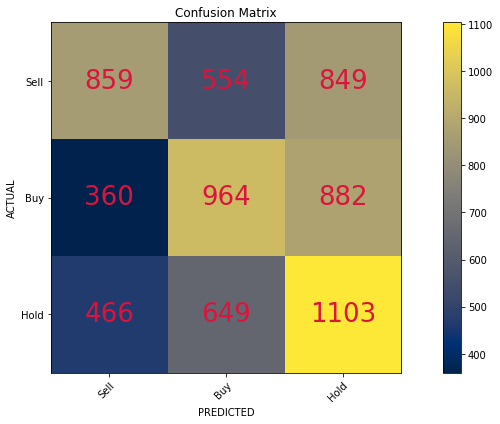

In [20]:
# Instatiating the model classifier with GridSearch's best parameters
k_clf = ran_search.best_estimator_

# Fitting the model
k_clf.fit(X_train, y_train)

# Printing Results
print("K Nearest Neighbors with tuned Parameters")
mod_results(k_clf, X_train, X_test, y_train, y_test)